In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
import matplotlib.pyplot as plt
import pandas as pd
import julia
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", "2022-02-15", "1h")#.make_norm_diff()
#print(getter)
#szereg = Get_Data.Get_Data("^IXIC", start="2021-09-20", end='2022-02-20', interval="1d").make_diff()
szereg = pd.read_csv("sim.csv")['x'][:100]
#print(szereg)
#getter.analiza_statystyczna_szeregu(szereg_pandas=szereg)

cart_ar = RF_AR(data=szereg, params={"lags": 2}, test_ratio=0.9)

In [3]:
#
#using Pkg
#Pkg.add("JLD2")
#Pkg.add("BetaML")
#
#using BetaML.Trees
#using JLD2
#x = rand(Float32, 100, 10) # 100 training samples, 10 predictors
#y = x[:,2] + x[:,4]
#print(typeof(y))
#myForest = buildForest(x,y,100)
#yhat = Trees.predict(myForest, x)
#print(yhat)

In [4]:
#using Pkg
#Pkg.add("JLD2")
#Pkg.add("DecisionTree")
#
#using DecisionTree
#Pkg.build("DecisionTree")
#Pkg.activate("DecisionTree")
#using JLD2

In [5]:
#cart_ar = RF_AR(data=szereg, params={"lags": 1}, test_ratio=0.9)
#opt = cart_ar.cross_validation_rolling_window(dlugosc_okna=1/5, params={"max_depth":3,
#                                                          "max_n_estimators":3,
#                                                          "min_sample_split":3,
#                                                          "min_samples_leaf":3})

#cart_ar.fit(params_fit={"max_depth": opt})

In [6]:
%%julia
Dict("A"=>2)

{'A': 2}

In [7]:
#using PyCall
#dlugosc_okna = 1/2
#X = py"cart_ar.X.values"
#data = py"cart_ar.data.values"
#prog = convert(Int64, round(dlugosc_okna * length(X)))
#
#X = reshape(X, size(X))
#data = reshape(data, size(data))
#X = reshape(X, size(X))
#
#println(typeof(X))
#println(typeof(data))
#println(typeof(prog))
#println(typeof(dlugosc_okna))
#println(typeof(Dict("dlugosc_okna"=> dlugosc_okna,
#                     "prog"=> prog,
#                     "data"=> data,
#                     "X"=> X,
#                     "params"=> Dict(
#                                    "max_depth"=> 3,
#                                    "max_n_estimators"=> 3,
#                                    "min_sample_split"=> 3,
#                                    "min_samples_leaf"=> 3))))
#println("--------------------------------------------------------------")
#include("resources/fast_jl/rf_cross_val.jl")
#
#
#rf_cross_val(Dict("dlugosc_okna"=> dlugosc_okna,
#                     "prog"=> prog,
#                     "data"=> data,
#                     "X"=> X,
#                     "params"=> Dict(
#                                    "max_depth"=> 3,
#                                    "max_n_estimators"=> 3,
#                                    "min_sample_split"=> 3,
#                                    "min_samples_leaf"=> 3)))

In [8]:
print(cart_ar.X)

           1         2
2  -0.854588 -1.272979
3  -0.687387 -0.854588
4  -0.305483 -0.687387
5  -0.435129 -0.305483
6  -0.746711 -0.435129
..       ...       ...
85 -0.603918  0.508236
86 -1.075125 -0.603918
87 -0.677187 -1.075125
88 -0.158617 -0.677187
89 -0.058055 -0.158617

[88 rows x 2 columns]


In [9]:
from julia import Pkg
from julia import Main

Pkg.add("DecisionTree")
Main.using("DecisionTree")
#
#opt = cart_ar.cross_validation_rolling_window_julia(1/3, {
#    "max_depth": 3,
#    "min_samples_split": 5,
#    "min_samples_leaf": 5
#})

    Updating registry at `C:\Users\micuk\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\micuk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\micuk\.julia\environments\v1.7\Manifest.toml`


In [10]:
opt = cart_ar.cross_validation_rolling_window_julia(1/2, {
    "max_depth": 2,
    "max_n_estimators": 3,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1586]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   34872625            0     16740234    259496546      3221468  ticks
       #2  4200 MHz   28630359            0      6816671    275662375       179390  ticks
       #3  4200 MHz   44368390            0     10486406    256254609       208640  ticks
       #4  4200 MHz   34767125            0      6232281    270110000       127000  ticks
       #5  4200 MHz   48114078            0     10043390    252951796       197296  ticks
       #6  4200 MHz   44294046            0      7503546    259311671       170359  ticks
       #7  4200 MHz   49752015            0      9417390    251939859       195703  ticks
       #8  4200 MHz   47084984            0      7834328    256189953     

In [11]:
cart_ar.fit(params_fit={"max_depth":opt["depth"],
                       "max_n_estimators":int(opt["max_n_estimators"]),
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

{'max_depth': 2.0, 'max_n_estimators': 2, 'min_samples_split': 2, 'min_samples_leaf': 3}
fit


forecast_raw
forecast_raw
forecast_raw
SUMA:  6  /  10


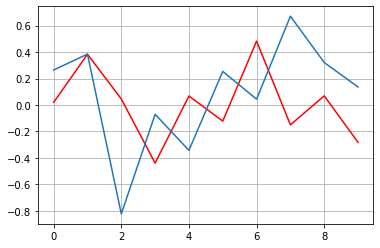

In [12]:
plt.plot(cart_ar.forecast_raw(), c='r')
plt.plot(cart_ar.data_test.values)
plt.grid()

print("SUMA: ",sum(cart_ar.data_test.values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))